In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
#plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,15)
%matplotlib inline

In [2]:
path_canon_1 = "./data/PNG/"
path_canon_2 = "./data/PNG-1/"
images_canon_1 = [i for i in os.listdir(path_canon_1) if i.endswith(".PNG")]
images_canon_2 = [i for i in os.listdir(path_canon_2) if i.endswith(".PNG")]
print("Total number of images from Canon1 camera is {}.".format(len(images_canon_1)))
print("Total number of images from Canon2 camera is {}.".format(len(images_canon_2)))

Total number of images from Canon1 camera is 223.
Total number of images from Canon2 camera is 200.


In [3]:
def read_image(image, path):
    return cv2.imread(os.path.join(path, image))
example_canon_1 = read_image(images_canon_1[0], path_canon_1)
example_canon_2 = read_image(images_canon_2[0], path_canon_2)

In [133]:
print("Each image in Canon1 dataset is RGB {}x{}".format(example_canon_1.shape[0], example_canon_1.shape[1]))
print("Each image in Canon2 dataset is RGB {}x{}".format(example_canon_2.shape[0], example_canon_2.shape[1]))

Each image in Canon1 dataset is RGB 1876x2820
Each image in Canon2 dataset is RGB 1732x2601


In [123]:
print("Max pixel value in first image is {}".format(np.max(example_canon_1)))

Max pixel value in first image is 40


###### Thats very weird. According to prof, the images are supposed to be on 0:4095 range. 

In [124]:
def get_max_pixel_value(images, path):
    global_max = 0
    for i in tqdm(images):
        image = read_image(i, path)
        current_max = np.max(image)
        if global_max < current_max:
            global_max = current_max
    return global_max
max_canon1 = get_max_pixel_value(images_canon_1, path_canon_1)
max_canon2 = get_max_pixel_value(images_canon_2, path_canon_2)
print("Max pixel value in Canon1 dataset is {}".format(max_canon1))
print("Max pixel value in Canon2 dataset is {}".format(max_canon2))


Max pixel value in Canon1 dataset is 60
Max pixel value in Canon2 dataset is 59


###### Lets try scaling colors


In [125]:
def inverse_gamma_transform(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 4095
    image = image ** (1/2.2) 
    image *= 255
    return image.astype(int)

In [126]:
scaled = scale_color(example_canon_1)


In [6]:
np.max(example_canon_1)

40

###### Cool. Lets try default stuff.

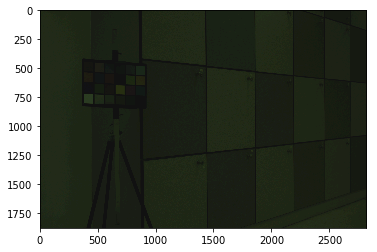

In [4]:
def scale_color(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return ((image / 60) * 255).astype(int)
scaled = scale_color(example_canon_1)
plt.imshow(scaled)

###### A bit better, but stil looks like crap. Lets keep it like that for now. Let's look at the second one.

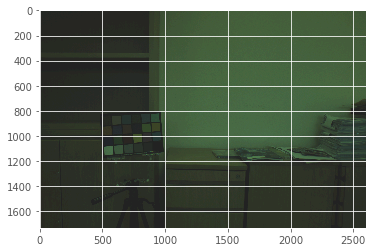

In [132]:
scaled = scale_color(example_canon_2)
plt.imshow(scaled)

# To be continued 

# Image Pre-processing NIKON

## Using OpenCV

In [23]:
# Dependencies 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
path = '000005.jpg'
#path = 'Data/Nikon_D40/PNG/NikonD40_0001.PNG'
img = cv2.imread(path)

In [25]:
img.shape

(375, 500, 3)

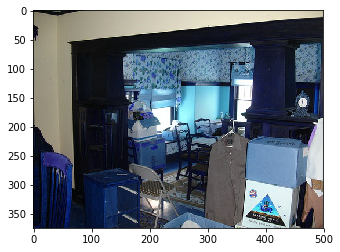

In [26]:
plt.imshow(img)

# Using Matplotlib

In [420]:
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image

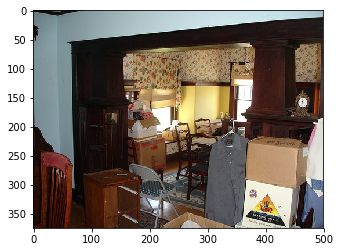

In [78]:
#path = 'Data/Nikon_D40/PNG/NikonD40_0003.PNG'
image = mpimg.imread(path)
plt.imshow(image)

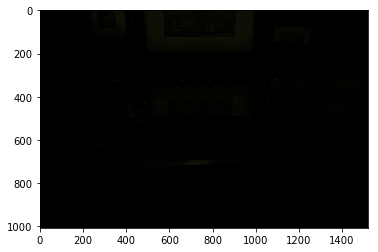

In [61]:
#  Matplotlib reads JPEG in 0 to 255 and PNG on 0 to 1 range hence no need of normalization
image = image**(1/1)
plt.imshow(image)

In [70]:
temp = image

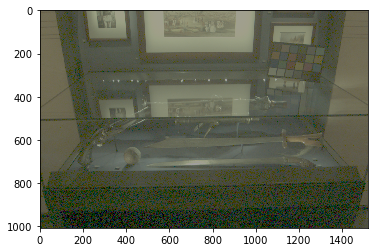

In [71]:
temp = image**(1/6)
plt.imshow(temp)

In [72]:
temp.shape

(1007, 1519, 3)

## Dealing with Checkers file

In [1]:
# Dealing with color txt files
path_chk_color = 'Data/Nikon_D40/CHECKER/NikonD40_0003_color.txt'
f =open(path_chk_color, "r")
mean_rgb = f.readlines()

# string to numeric
for n,i in enumerate(mean_rgb):
    temp = [float(mean_rgb[n].strip().split(',')[j]) for j in range(3)]
    mean_rgb[n] = temp

In [2]:
# Dealing with mask txt files
path_chk_mask = 'Data/Nikon_D40/CHECKER/NikonD40_0003_mask.txt'
f =open(path_chk_mask, "r")
mask = f.readlines()

# string to numeric
for n,i in enumerate(mask):
    temp = [float(mask[n].strip().split(',')[j]) for j in range(4)]
    mask[n] = temp
    
# ROI, X and Y axis
roi = mask[0]
x = []
y = []
for i in range(1,49,2):
    x.append(mask[i])
    y.append(mask[i+1])

In [3]:
roi

[1047.1, 144.2, 282.01, 194.33]

TypeError: Invalid dimensions for image data

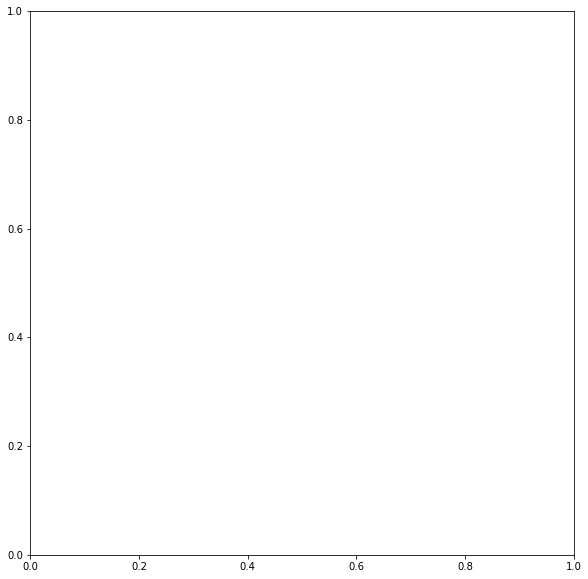

In [7]:
# Create figure and axes
fig,ax = plt.subplots(1)
fig.set_size_inches(10,10)
# Display the image
ax.imshow(temp)

# Add the patch to the Axes
rect_1 = patches.Rectangle((roi[0], roi[1]),roi[2], roi[3],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect_1)
[22.622, 21.003, 57.188, 58.535],
[201.34, 238.23, 237.06, 200.37],
for i in range(len(x)):
    ht = ((y[i][1] - y[i][0]) + (y[i][2] -  y[i][3]))/2
    wd = ((x[i][2] - x[i][1]) + (x[i][3] -  x[i][0]))/2
    mid_x = (x[i][2] - wd/2)
    mid_y = (y[i][2] - ht/2)
  
    temp_pt = patches.Rectangle((roi[0] + x[i][0] , roi[1] + y[i][0]), wd, ht,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(temp_pt)



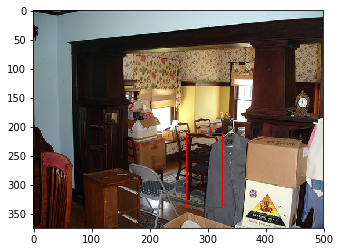

In [89]:
# Create figure and axes
fig,ax = plt.subplots(1)
#fig.set_size_inches(10,10)
# Display the image
ax.imshow(image)

# Add the patch to the Axes
rect_1 = patches.Rectangle(((263,211.0)),(324-263), (339-211),linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect_1)


In [ ]:
8 0.585 0.7306666666666667 0.122 0.3413333333333333
8 0.41600000000000004 0.8453333333333333 0.176 0.288
8 0.534 0.6546666666666666 0.108 0.27999999999999997

In [80]:
8 0.585 0.7306666666666667 0.122 0.3413333333333333
xmin, xmax, ymin, ymax
263   324   211   339
32

293.5

In [94]:
x_mid = 324 - (324-262)/2
y_mid = 339 - (339-211)/2

In [98]:
(x_mid-86.8)/86.8

2.3755760368663594

In [109]:
# Normalizing datapoints 
dw = 1/500
dh = 1/375
x = (324+263)/2 - 1
y = (339+211)/2 - 1
w = 324-263
h = 339-211
x = x*dw
w = w*dw
y = y*dh
h = h*dh

## Preprocessing images/labels for yolo network

In [373]:
"""
- read images
- get shape width, height, depth (c,r,3)
- get x and y coordinates of boxes
- calc x_mid, y_mid, w, h
- calc normalized x, y, w, h 
- create text file and store each class x, y, w, h for each box line after line
- create a train.txt file t
"""

def std_box(h, w, box):
    
    dw = 1/w
    dh = 1/h
    x = (box[0] - 1)*dw
    y = (box[1] - 1)*dh
    w = box[2]*dw
    h = box[3]*dh
    return x,y,w,h


## read images
PATH_BASE_IMG = 'Data/darknet/build/darknet/x64/data/obj/Canon1DsMkIII_000'
FULL_PATH_IMG = [(PATH_BASE_IMG + str(i) + '.PNG') for i in range(1,10)]
images = [cv2.imread(file) for file in path_num]

## read bounding boxes

# read from path
PATH_BASE_BOX = 'Data/darknet/build/darknet/x64/data/obj/checker/Canon1DsMkIII_000'
FULL_PATH_BOX = [PATH_BASE_BOX + (str(i) + "_mask.txt") for i in range(10)]
mask = list()
for i in range(1,len(FULL_PATH_BOX)):
    temp_path = FULL_PATH_BOX[i]
    f =open(temp_path, "r")
    mask.append(f.readlines())

# convert string to numeric
for j in range(len(mask)):
    for n,i in enumerate(mask[j]):
        temp = [float(mask[j][n].strip().split(',')[k]) for k in range(4)]
        mask[j][n] = temp
    
# save values in lists: ROI, X and Y axis
roi = [mask[i][0] for i in range(len(mask))]
x_coords = list()
y_coords = list()
for j in range(len(mask)):
    temp_x_coords = list()
    temp_y_coords = list()
    
    for i in range(1,49,2):
        temp_x_coords.append(mask[j][i])
        temp_y_coords.append(mask[j][i+1])
    
    x_coords.append(temp_x_coords)
    y_coords.append(temp_y_coords)


for i,image in enumerate(images):
    
    print(image.shape)
    h, w, _ = image.shape
    temp_label_box = '0'
    temp = std_box(h, w, box=roi[i])
    for j in temp: temp_label_box += ' '+str(j) 
    temp_label_box += '\n'
    
    x_i = x_coords[i]
    y_i = y_coords[i]
    for j in range(len(x_i)):
        
        
        temp_label_box += str(j+1)
        x_mid = (x_i[j][0] + x_i[j][3])/2
        y_mid = (y_i[j][0] + y_i[j][1])/2
        ht_temp = y_i[j][1] - y_i[j][0]
        wd_temp = x_i[j][3] - x_i[j][0]
        box = [x_mid, y_mid, wd_temp, ht_temp]
        temp = std_box(h, w, box)
        
        for k in temp: temp_label_box += ' '+str(k)
        temp_label_box += '\n'

    #with open('Data/filename'+str(i+1)+'.txt', 'w') as f:
     #   f.write(temp_label_box)

(1876, 2820, 3)
(1876, 2820, 3)
(1876, 2820, 3)
(1876, 2820, 3)
(2820, 1876, 3)
(1876, 2820, 3)
(1876, 2820, 3)
(1876, 2820, 3)
(1876, 2820, 3)


In [520]:
path  = 'Yolo/cfg/yolov3.cfg'
file = open(path, 'r')
lines = file.read().split('\n')                        # store the lines in a list
lines = [x for x in lines if len(x) > 0]               # get read of the empty lines 
lines = [x for x in lines if x[0] != '#']              # get rid of comments
lines = [x.strip() for x in lines] 

In [450]:
temp = [lines[i].split() for i in range(len(lines))]

In [ ]:
#temp[0][0][-1]
temp_dict = dict()
for n,line in enumerate(lines):
    print(line[0])
    if line[0] == '[':
        print("up")
        temp_key = str(line[1:-1])
        temp_dict[temp_key] = list()
        
    else :
        temp_tuple = tuple(i.strip() for i in line.split('='))
        print(temp_tuple)
        temp_dict[temp_key].append(temp_tuple)

        

In [581]:
n

647

In [540]:
lines[1].split('=')

['batch', '64']

In [458]:
if temp[0][0][-1] in ASC

']'

In [508]:
lines[2].rstrip().lstrip()

'subdivisions=16'

In [597]:
block = {}
blocks = []

for line in lines:
    if line[0] == "[":               # This marks the start of a new block
        if len(block) != 0:          # If block is not empty, implies it is storing values of previous block.
            blocks.append(block)     # add it the blocks list
            block = {}               # re-init the block
        block["type"] = line[1:-1].rstrip()     
    else:
        key,value = line.split("=") 
        block[key.rstrip()] = value.lstrip()
blocks.append(block)


In [589]:
a = np.random.randint(1,100,(3,2,4))

In [647]:
import random
np.random.permutation(16)

array([13,  8,  7, 15, 10,  0,  2,  5,  3, 12, 14, 11,  6,  1,  4,  9])

In [655]:
list(np.random.choice([i for i in range(4)], size= 16))

[3, 3, 0, 1, 0, 1, 1, 2, 1, 2, 3, 3, 0, 3, 3, 0]

In [667]:
import torch

img = cv2.imread("yolo/dog-cycle-car.png")
print(img.shape)
img = cv2.resize(img, (608, 608))		# Resize to the input dim
print(img.shape)
img_ = img[:,:,::-1].transpose((2,0,1))	# BRG -> RBG | HXWC -> CXHXW
print(img_.shape)
img_ = img_[np.newaxis, :, :, :]/255
print(img_.shape)
img_ = torch.from_numpy(img_).float()
img_ = Variable(img_)



(452, 602, 3)
(608, 608, 3)
(3, 608, 608)
(1, 3, 608, 608)


NameError: name 'Variable' is not defined